In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Install geodatasets library**

<h>The geodatasets contains an API on top of a JSON with metadata of externally hosted datasets containing geospatial information useful for illustrative and educational purposes.</h>

https://geodatasets.readthedocs.io/en/latest/


In [ ]:
!pip install geodatasets

**Import libraries**

These libraries have all the tools to realise the EDA with information methos, statistics and visualisation to go deep into the data set.

In [ ]:
#data manipulation and visualisation libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#tools for plot map libraries
import folium
import geopandas as gpd
import geodatasets

**Function definition**

This function realise the clean step on coluns. it prepare dataset to be used.

In [ ]:
# defining a clean function

def clean_price(df, columns):
  '''
  retur a df with removed symbols and converted values from string to numerical values

  Input:
    df: pandas dataframe
    columns: list of columns to clean

  Output:
    df: pandas dataframe
  '''

  for i in columns:
    df[f'{i}_num'] = df[i].str.replace('$', '').str.replace(',', '').astype(float)

  return df

This function calculate the relative standar deviation to the mean

In [ ]:
# defining a function to calculate RSD (relative standar deviation)
def RSD(x):
    '''
    returns the relative standard deviation

    Input:
        x: pandas series

    Output:
        RSD: calcularion result float
    '''
    return round(x.std()/x.mean()*100, 0)

***Business Understanding***
<h1><b> **Boston Airbnb Open Data: A Data Science Approach**</b></h1>

<h2> The goal is to use data from Boston Airbnb Open Data to plan cheap travel to Boston. </h2>

Statements and proposed questions:

* Thinking of myself as a customer planning a trip to Boston, perhaps to visit and enjoy the city, I postulated three key questions that will guide the **EDA tasks** to get insights.

**Question 1** - What is the distribution of rental prices across different neighborhoods in Boston?

**Question 2**- How do rental prices vary by property type (e.g., apartment, house, condo)

**Question 3**- Are there any identifiable trends or seasonal patterns in booking rates over time?

<h2><br>Key goals include:</br></h2>

* Data understand
* Prepare the Data
* Map price visualizaton
* Comparative Analysis of the rental rates by grouped tables
* Bar chart visualization
* Conclusion  

***Data Understanding***

<h3>Gather the data:</h3>

The data are free to use and can be find here:

</h4><b><br>**Airbnb data set:**</br></b></h4>

A sneak peek into the Airbnb activity in Boston, MA, USA from Kaggle.com. https://www.kaggle.com/datasets/airbnb/boston

* Calendar: including listing id and the price and availability for that day
* Listings: including full descriptions and average review score
* Reviews: including unique id for each reviewer and detailed comments


</h4><b><br>**Boston Map data set:**</br></b></h4>

It will be used to visualize the map from Authoritative police districts dataset for the City of Boston. https://bostonopendata-boston.opendata.arcgis.com/datasets/9a3a8c427add450eaf45a470245680fc/explore


<h3>Assess the Data:

In [ ]:
#Uploading the Airbnb data sets from Kaggle files
df_calendar = pd.read_csv('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/calendar.csv')

df_listings = pd.read_csv('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/listings.csv')

In [ ]:
#getting the Boston map data from shp file in the unziped directory from Boston open data.
gdf = gpd.read_file('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/Police_Districts.zip (Unzipped Files)/Police_Districts.shp')

<h3>Some info about the datasets</h3>

* **df_calendar** info: the price for properties that have NO avaliable contains null values.
* **df_listings** info: include all features for each property. There are strong null values proportion.


In [ ]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [ ]:
# making a deep copy of the listing data set
df = df_listings.copy(deep=True)

***Prepare Data***

<h3>Clean data</h3>

This step removes some symbols from the price data values and convert from string to numerical values, creating some new numerical columns.

In [ ]:
# set the linst of columns to clean
columns_to_clean = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

In [ ]:
# call the clean_price function defined above
df = clean_price(df, columns_to_clean)

In [ ]:
# search for any instances of NaN values
df.isna().sum()

id                         0
listing_url                0
scrape_id                  0
last_scraped               0
name                       0
                        ... 
price_num                  0
weekly_price_num        2693
monthly_price_num       2697
security_deposit_num    2243
cleaning_fee_num        1107
Length: 100, dtype: int64

In [ ]:
# search for any instances of duplicated lines
df.duplicated().sum()

0

* The NaN values were not included in the tritment because they had no impact on the goals.

* There are no duplicated lines.

Descriptive statistics with boxplot:

<ipython-input-15-ee859db38da3>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x = 'price_num', hue = i, ax = ax[1])


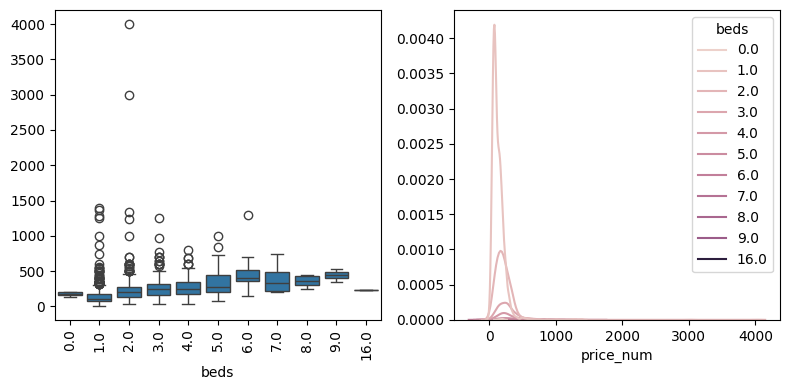

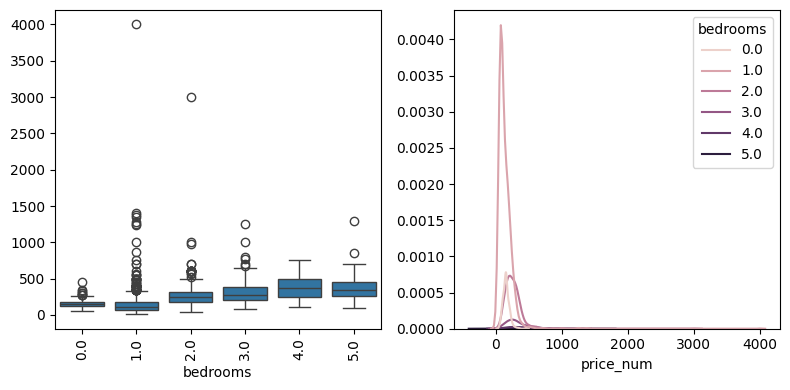

<ipython-input-15-ee859db38da3>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x = 'price_num', hue = i, ax = ax[1])


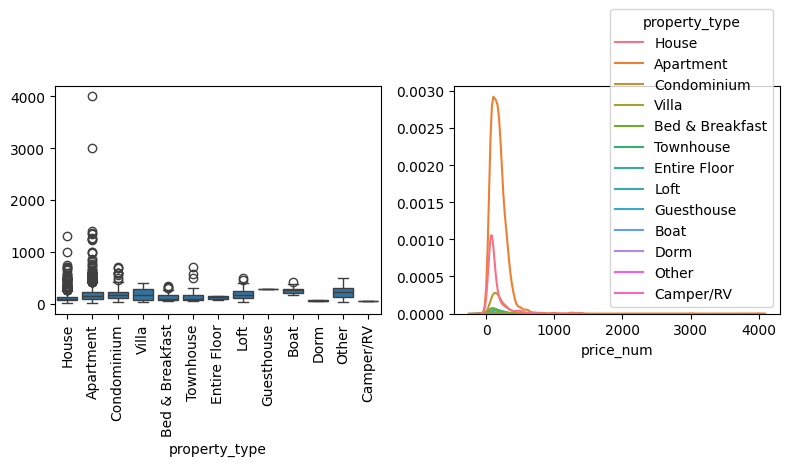

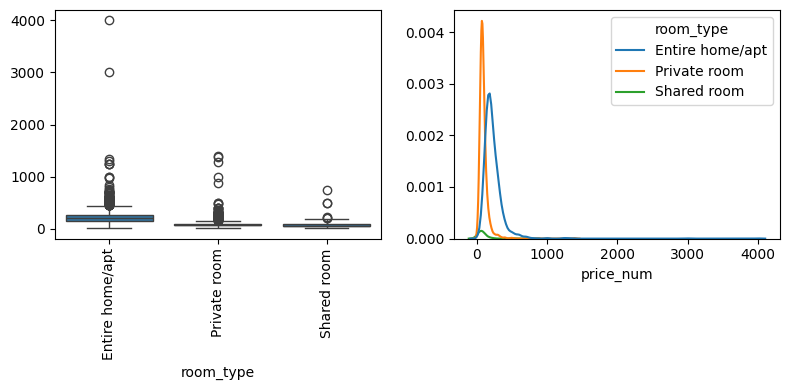

In [ ]:
# plot for descriptive statistics

for i in ['beds', 'bedrooms', 'property_type', 'room_type']:
  fig, ax = plt.subplots(1,2,figsize = (8, 4))
  sns.boxplot(data=df, x = i, y='price_num', ax = ax[0])
  ax[0].tick_params(axis='x', rotation=90)
  ax[0].set_ylabel('')
  sns.kdeplot(data=df, x = 'price_num', hue = i, ax = ax[1])
  ax[1].set_ylabel('')
  plt.tight_layout()
  plt.show()

Looking at the boxplot for some **columns** versus **price** distribution, it is possible to see the strong outliers present in the data and the distribution skewed to the right. Even though this is common in financial data, it requires a certain degree of care and attention to maintain.

***Evaluation***

The sequence below shows the strategy to answer the questions.

**Question 1:** *What is the distribution of rental prices across different neighborhoods in Boston?*

  
**strategy:**
* The first question is geographical. So, a visualisation of the location of properties on the map of Boston with price differentiation criteria can be used to answer this question.

* Three map plotting options were used: the **Folium**, a library that has a number of built-in tilesets from OpenStreetMap, a simple **seaborn scatterplot** and the **Geopandas** that plot of a *GeoDataFrame* with matplotlib.

MAP PLOT TEST 1: Ploting using **folium** library:

In [ ]:
# center of the map
boston_coords = [42.3601, -71.0589]
mapa = folium.Map(location=boston_coords, zoom_start=12)

# dividing the property locations into three categories
coord50 = df[df['monthly_price_num'] <= 2500]
coordenadas50 = set(zip(coord50['latitude'], coord50['longitude']))

coord100 = df[(df['monthly_price_num'] > 2500) & (df['price_num'] <= 5000)]
coordenadas100 = set(zip(coord100['latitude'], coord100['longitude']))

coord500 = df[df['monthly_price_num'] >= 5000]
coordenadas500 = set(zip(coord500['latitude'], coord500['longitude']))

# inserting on the map
for coord in coordenadas50:
    folium.Marker(location=coord, icon=folium.Icon(color='blue', icon='info-sign')).add_to(mapa)

# this category was omitted because it will be very hard to run
# for coord in coordenadas100:
    #folium.Marker(location=coord, icon=folium.Icon(color='green', icon='info-sign')).add_to(mapa)

for coord in coordenadas500:
    folium.Marker(location=coord, icon=folium.Icon(color='red', icon='info-sign')).add_to(mapa)

display(mapa)

 - result: it was good but hard tu run

MAP PLOT TEST 2: Plotting the map using the **seabron scatterplot**

<Axes: xlabel='longitude', ylabel='latitude'>

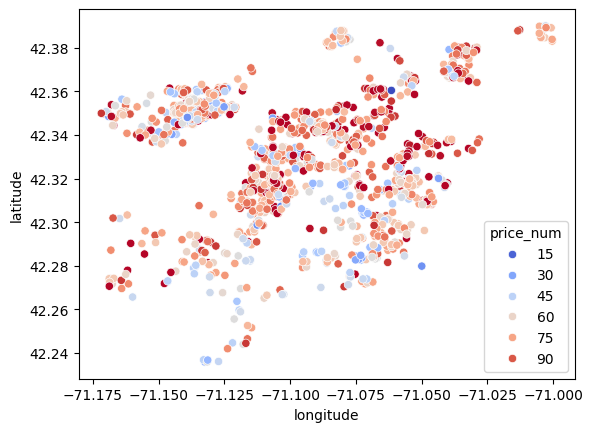

In [ ]:
# there are some options to filter the location by price:

# location_point = df[(df['cleaning_fee_num'] <= 50) | (df['cleaning_fee_num'] > 200)]

location_point = df[(df['price_num'] <= 100)]

sns.scatterplot(x=location_point['longitude'], y=location_point['latitude'], hue=location_point['price_num'], palette=sns.color_palette("coolwarm", as_cmap=True))

- Result: It was good but not good enoff.

MAP PLOT TEST 3: Plotting the map using the **geopandas** library and inserting a **seaborn** scatterplot together.

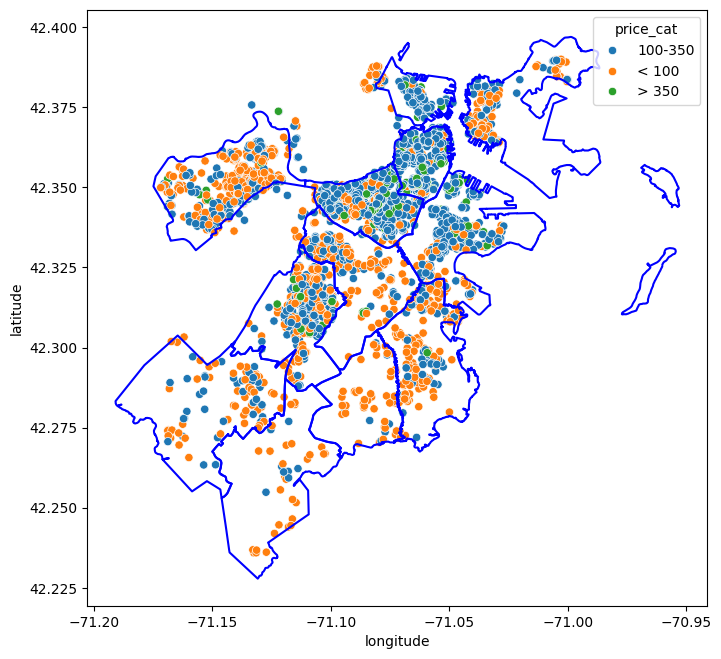

In [ ]:
# Create a data set for locations and prices in three categories
price_cat = []
for i in df['price_num']:
  price_cat.append('< 100' if i < 100 else '> 350' if i > 350 else '100-350')

df_map = pd.concat([df[['latitude', 'longitude']], pd.Series(price_cat, name='price_cat')], axis=1)

# plot the locations on the Boston map
gdf.boundary.plot(figsize=(8, 8), color='blue') #geopandas
sns.scatterplot(x=df_map['longitude'], y=df_map['latitude'], hue=df_map['price_cat']) #seaborn
plt.show()

- yes, this is the one!

* Since plotting all prices at once will not work, it is useful to create a dataset of geographic property coordinates with categorical price column ranges: < 100, 100-350 and >350, and plot the locations on a map of Boston.

**Figure enhancement:**

* inserting more visual informations on the map and save the figure

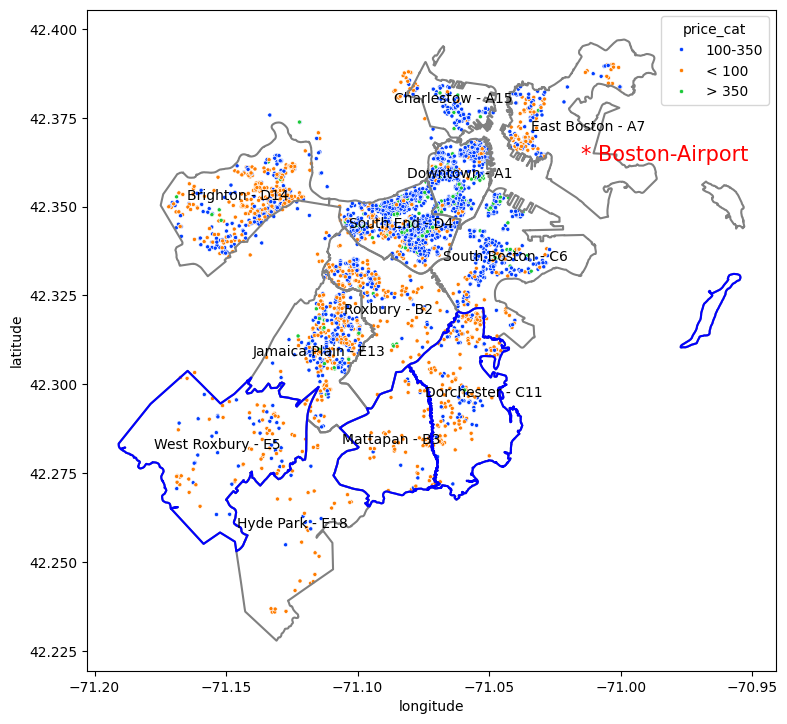

In [ ]:
# creating a dictionary to map the districts tag from Boston map data to 'name - tag' format
districts = {
    'A1': 'Downtown - A1',
    'A15': 'Charlestow - A15',
    'A7': 'East Boston - A7',
    'B2': 'Roxbury - B2',
    'B3': 'Mattapan - B3',
    'C6': 'South Boston - C6',
    'C11': 'Dorchester - C11',
    'D4': 'South End - D4',
    'D14': 'Brighton - D14',
    'E5': 'West Roxbury - E5',
    'E13': 'Jamaica Plain - E13',
    'E18': 'Hyde Park - E18'
        }

# map using the districts dictionary to a new gdf column
gdf['names'] = gdf['DISTRICT'].map(districts)

#instantiate the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the boundaries of the district from gdf dataset
gdf.boundary.plot(ax=ax, color='gray')

#select region to highlight
highlighted_district = gdf[gdf['names'].isin(['Dorchester - C11', 'Mattapan - B3', 'West Roxbury - E5'])]
highlighted_district.boundary.plot(ax=ax, color='blue')

# Annotate the plot with region names
for idx, row in gdf.iterrows():
    plt.annotate(text=row['names'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=10, color='black')

# insert the property location
sns.scatterplot(x=df_map['longitude'], y=df_map['latitude'], hue=df_map['price_cat'], palette='bright', marker='.')

# print the airport location
plt.text(-71.015, 42.363, '* Boston-Airport', fontdict=dict(fontsize=15, color='red'))

#figure layaout adjustment
plt.tight_layout()

#save the figure
plt.savefig('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/price_X_location.jpg', format='jpg', dpi=600)

plt.show()

The map above illustrates the price category distribution across the city. It can be observed that the southern region has the lowest prices. The three most low-cost regions selected have blue boundaries.

**Question 2:** *How do rental prices vary by property type (e.g., apartment, house, condo)*

**strategy:**
  * Use of a groupby to present concise information: The data has been **split** by each '*property_type*', a series of statistical calculations was **applied** to their price splits and then all **combined** in the final table.'

In [ ]:
# call a groupby method with agg() function
# the RSD function was called in the agg()
property_type_group = df.groupby('property_type')['price_num'].agg(['mean', 'std', 'min', 'max',
                                                                    'count', RSD]).round(1).sort_values(by='mean',
                                                                    ascending=False).reset_index()

property_type_group

,property_type,mean,std,min,max,count,RSD
0,Guesthouse,289.0,NaN,289.0,289.0,1,NaN
1,Boat,268.8,77.8,175.0,425.0,12,29.0
2,Other,229.9,143.4,40.0,500.0,17,62.0
3,Condominium,190.2,122.2,30.0,700.0,231,64.0
4,Villa,189.5,142.1,40.0,400.0,6,75.0
5,Loft,185.4,104.0,30.0,500.0,39,56.0
6,Apartment,182.0,154.3,10.0,4000.0,2612,85.0
7,Townhouse,149.0,126.2,44.0,700.0,54,85.0
8,House,131.6,131.1,20.0,1300.0,562,100.0
9,Bed & Breakfast,129.4,79.1,44.0,350.0,41,61.0


**The groupby table shows that:**


* The most offered type of property is the **apartment**, followed by the **house** and the **condominium**, as can be seen from the property count column.

* The RSD (percent Relative Standard Deviation to the mean) shows a large variation, perhaps depending on the location, the accommodation, the facilities offered, the bathrooms, the beds, and so on.

* The guesthouses tend to be more expensive than anything else, but there is only one such property on offer.

* There are a large range of price!



**Visualisation as a bar chart from groupby table**

* to visualize these results from groupby table it is useful plot a barchart on selected statistics:

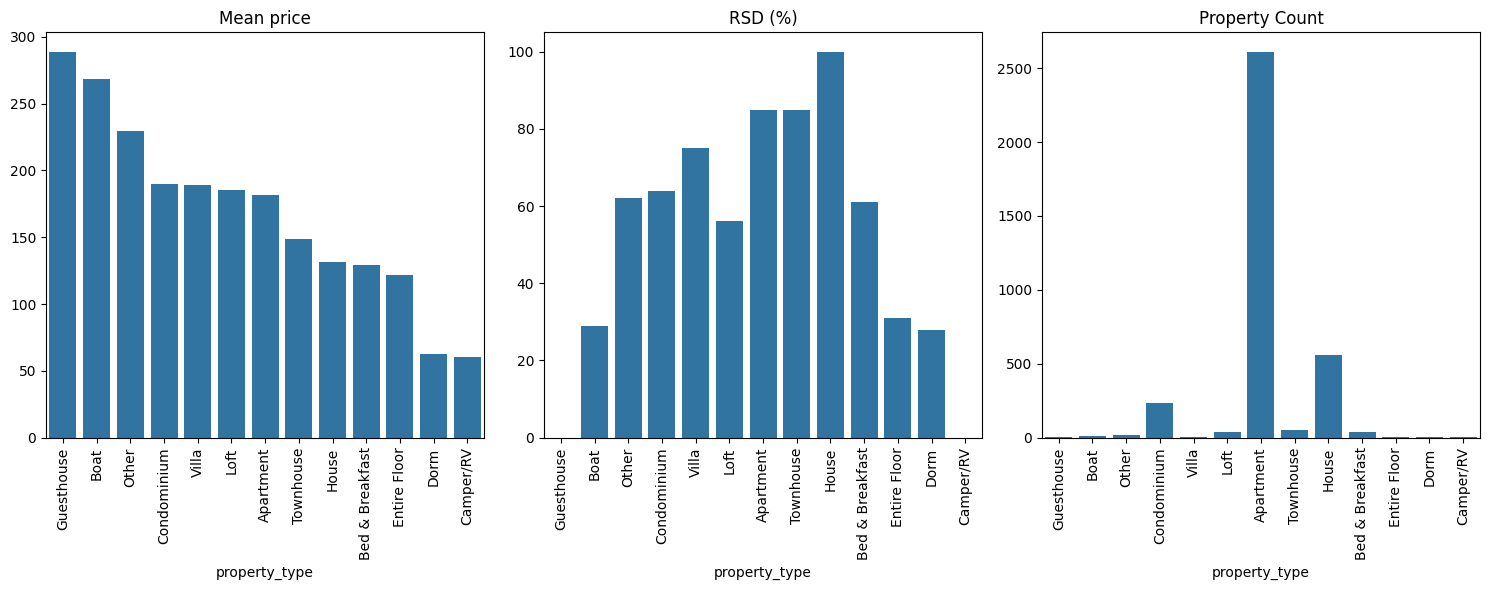

In [ ]:
# plotting a bar chart for selected statistic

fig, ax, = plt.subplots(1,3,figsize=(15, 6))
a=0
for i in ['mean', 'RSD', 'count']:
  sns.barplot(data=property_type_group, x='property_type', y=i, ax=ax[a])
  ax[a].tick_params(axis='x', rotation=90)
  a+=1

ax[0].set_title('Mean price')
ax[1].set_title('RSD (%)')
ax[2].set_title('Property Count')


ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/price_X_property_bar.jpg', format='jpg', dpi=600)

plt.show()

This visualisation provides a more straightforward means of gaining insights from the groupby table.

**Qustion 3:** *Are there any identifiable trends or seasonal patterns in booking rates over time?*

**strategy:**

* Using the calendar dataset to answer.

<ipython-input-22-73a094a15372>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_available.loc[:, 'price_num'] = df_calendar_available.loc[:, 'price'].str.replace('$', '').str.replace(',','').astype(float)
<ipython-input-22-73a094a15372>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_available.loc[:, 'date_month'] = pd.to_datetime(df_calendar_available.loc[:, 'date']).dt.month


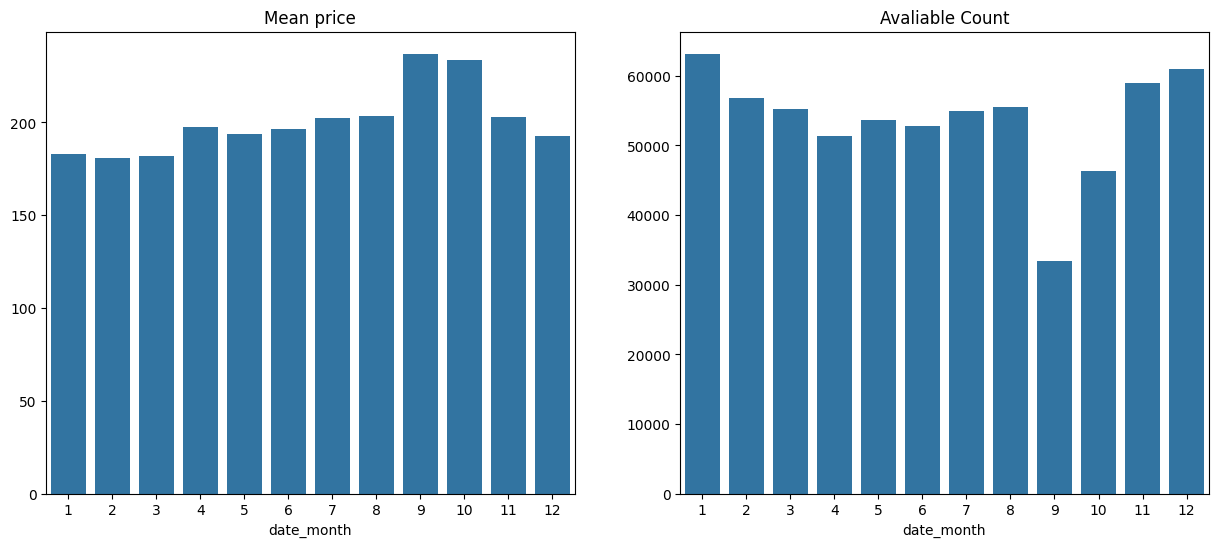

In [ ]:
# selectin only the avaliable (t) property
df_calendar_available = pd.DataFrame()
df_calendar_available = df_calendar[df_calendar['available'] == 't']

# clean simbols and transform it as a number
df_calendar_available.loc[:, 'price_num'] = df_calendar_available.loc[:, 'price'].str.replace('$', '').str.replace(',','').astype(float)

#Using the groupby method
df_calendar_available.loc[:, 'date_month'] = pd.to_datetime(df_calendar_available.loc[:, 'date']).dt.month
df_calendar_available_group = df_calendar_available.groupby(df_calendar_available[
    'date_month'])['price_num'].agg(['mean','std', 'min', 'max', 'count', RSD]).round(1).sort_values(by='mean', ascending=False).reset_index()

# plot the bar chart and save the figure
fig, ax, = plt.subplots(1,2,figsize=(15, 6))

a = 0
for i in ['mean', 'count']:
  sns.barplot(data=df_calendar_available_group, x='date_month', y=i, ax=ax[a])
  ax[a].tick_params(axis='x', rotation=0)
  a+=1

ax[0].set_title('Mean price')
ax[1].set_title('Avaliable Count')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

plt.savefig('/content/drive/MyDrive/UDACITY/Project: Writing a Data Scientist Blog Post/price_X_avaliable.jpg', format='jpg', dpi=600)


plt.show()

It is evident that the seasonality of this product is not particularly pronounced. However, it is clear that prices are higher in September and October, and that availability is lower than at other times of the year.

<Axes: xlabel='neighbourhood'>

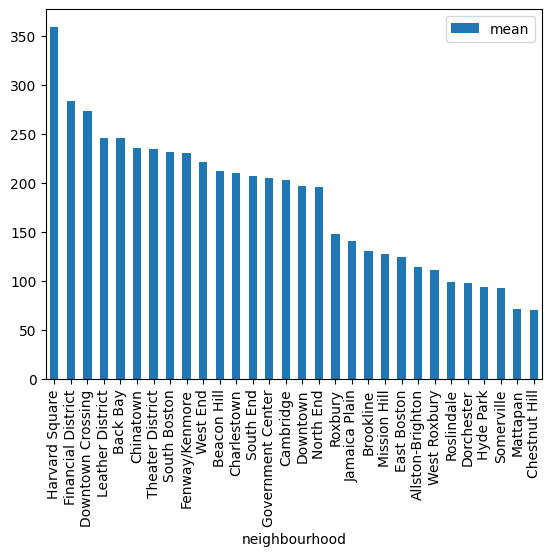

In [ ]:
df.groupby(['neighbourhood'])['price_num'].agg(['mean','std',
                                                'min', 'max', 'count', RSD]).round(1).sort_values(by='mean',
                                                ascending=False).reset_index().plot(kind='bar', x='neighbourhood', y='mean')

This visualization provides information about the mean price per region. The Dorchester is conveniently located close to the city centre (see the location map) and offers competitive pricing.

<h1>Conclusion:</h1>

<h2>The analysis of the three questions with EDA process leads to the conclusion that the most cost-effective option for those seeking to minimise their expenditure is to rent an <b>apartment</b> in the <b>Dorchester</b> region during the <b>first half</b> of the year.</h2>